In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# Data preprocessing
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

In [ ]:
# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 44507891.11it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 98006224.78it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 42352391.37it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 10936009.63it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# len(train_dataset)
len(test_dataset)

10000

In [ ]:
# Data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
# Define the model architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc = nn.Linear(64 * 5 * 5, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        x = x.view(-1, 64 * 5 * 5)
        x = self.fc(x)
        return x

model = CNN().to(device)

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, running_loss / len(train_loader)))

Epoch [1/10], Loss: 0.1696
Epoch [2/10], Loss: 0.0513
Epoch [3/10], Loss: 0.0365
Epoch [4/10], Loss: 0.0281
Epoch [5/10], Loss: 0.0225
Epoch [6/10], Loss: 0.0179
Epoch [7/10], Loss: 0.0152
Epoch [8/10], Loss: 0.0120
Epoch [9/10], Loss: 0.0117
Epoch [10/10], Loss: 0.0081


In [ ]:
import matplotlib.pyplot as plt


# Function to plot the image
def plot_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Function to get the predicted and ground truth labels
def get_labels(prediction, label):
    predicted_label = prediction.item() if torch.is_tensor(prediction) else prediction
    ground_truth_label = label.item() if torch.is_tensor(label) else label
    return predicted_label, ground_truth_label

Accuracy on the test set: 98.99%


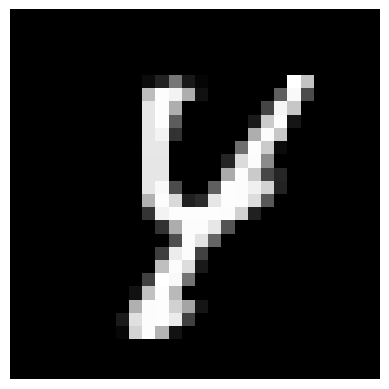

Ground Truth Label: 4  Predicted Label: 4


In [ ]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print('Accuracy on the test set: {:.2f}%'.format(accuracy),end="\n")


# Select a random index from the test set
index = 1024  # Change this index to select a different image

# Get the input, output, and label
input_image = test_dataset[index][0].unsqueeze(0).to(device)
output = model(input_image)
_, predicted_label = torch.max(output.data, 1)
ground_truth_label = test_dataset[index][1]

# Get the predicted and ground truth labels
predicted_label, ground_truth_label = get_labels(predicted_label, ground_truth_label)

# Convert the input image to a numpy array and plot it
input_image = input_image.squeeze().cpu().numpy()
plot_image(input_image)

print('Ground Truth Label:', ground_truth_label,end="  ")
print('Predicted Label:', predicted_label)